In [18]:
import pandas as pd
import requests,csv
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
data_dict = {'B08133_001E':'Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK', 
            'B08133_007E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:00 a.m. to 7:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_008E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:30 a.m. to 7:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_009E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:00 a.m. to 8:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_010E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:30 a.m. to 8:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_011E' : 'Estimate!!Aggregate travel time to work (in minutes):!!9:00 a.m. to 9:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_012E' : 'Estimate!!Aggregate travel time to work (in minutes):!!10:00 a.m. to 10:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_013E' : 'Estimate!!Aggregate travel time to work (in minutes):!!11:00 a.m. to 11:59 a.m.	AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_001E' : 'Estimate!!Total SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_007E' : 'Estimate!!Total:!!7:00 a.m. to 7:29 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_008E' : 'Estimate!!Total:!!7:30 a.m. to 7:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_009E' : 'Estimate!!Total:!!8:00 a.m. to 8:29 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_010E' : 'Estimate!!Total:!!8:30 a.m. to 8:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_011E' : 'Estimate!!Total:!!9:00 a.m. to 9:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_012E' : 'Estimate!!Total:!!10:00 a.m. to 10:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_013E' : 'Estimate!!Total:!!11:00 a.m. to 11:59 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08136_002E' : 'Estimate!!Aggregate travel time to work (in minutes):!!Car, truck, or van: AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08136_007E' : 'Estimate!!Aggregate travel time to work (in minutes):!!Public transportation (excluding taxicab): AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            # 'B08136_012E' : 'Estimate!!Aggregate travel time to work (in minutes):!!Taxicab, motorcycle, bicycle, or other means:AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08006_002E' : 'Estimate!!Total:!!Car, truck, or van: SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08006_008E' : 'Estimate!!Total:!!Public transportation (excluding taxicab): SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            # 'B08006_014E' : 'Estimate!!Total:!!Bicycle	SEX OF WORKERS BY MEANS',
            # 'B08006_016E' : 'Estimate!!Total:!!Taxicab, motorcycle, or other means SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            "avg_time_agg" : "B08133_001E/B08011_001E",
            "avg_time_to_work_7_8am" : "(B08133_007E + B08133_008E)/(B08011_007E+ B08011_008E)",
            "avg_time_to_work_8_9am": "(B08133_009E + B08133_010E)/(B08011_009E+ B08011_010E)",
            "avg_time_to_work_9_10am" : "(B08133_011E + B08133_012E)/(B08011_011E+ B08011_012E)"}

data_dict = pd.Series(data_dict, name = "Definition")
data_dict.index.name = "col_name"
data_dict = data_dict.reset_index()

In [20]:
years = [2015,2019]
key = '9e840ebf4aecf1dfee3001ca5b9df8a1c5c8e541'
variables="NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,B08011_010E,B08133_010E,B08011_011E,B08133_011E,B08011_012E,B08133_012E,B08011_013E,B08133_013E,B08136_002E,B08136_007E,B08136_012E,B08006_002E,B08006_008E,B08006_016E"

for y in years:
    url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=zip%20code%20tabulation%20area:*&in=state:44&key={key}"
    
    response = requests.get(url)
    data = response.json()

    with open(f"RI_ZCTA_raw_{y}.csv", "w", newline='') as writefile:
        writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
        writer.writerows(data)

In [21]:
for y in years:
    df = pd.read_csv(f"RI_ZCTA_raw_{y}.csv")
    # B08133_001E = Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK
    # 
    df["avg_time_agg"] = df.B08133_001E/df.B08011_001E 
    # (Aggregate travel time (minutes) to work in minutes of workers departing between 7AM and 7:29 + Aggregate travel time (minutes) 
    # of workers departing between 7:30 and 7:59) / 
    df["avg_time_to_work_7_8am"] = (df.B08133_007E + df.B08133_008E)/(df.B08011_007E+ df.B08011_008E)
    df["avg_time_to_work_8_9am"] = (df.B08133_009E + df.B08133_010E)/(df.B08011_009E+ df.B08011_010E)
    df["avg_time_to_work_9_10am"] = (df.B08133_011E + df.B08133_012E)/(df.B08011_011E+ df.B08011_012E)

    df["avg_travel_ctv"] = df.B08136_002E/df.B08006_002E # Average travel time to work by car, truck, or van
    df['avg_travel_pt'] =  df.B08136_007E/df.B08006_008E # Average travel time to work by public transit, excluding taxi
    df['year'] = y
    df.to_csv(f"RI_ZCTA_mod_{y}.csv")
    # data_2015['avg_travel_other'] = data_2015.B08136_012E/data_2015.B08006_016E

In [22]:
data_2015 = pd.read_csv("RI_ZCTA_mod_2015.csv")
data_2019 = pd.read_csv("RI_ZCTA_mod_2019.csv")

with pd.ExcelWriter('ZCTA_data.xlsx') as writer:
    data_dict.to_excel(writer, sheet_name="Data Dictionary")
    data_2015.to_excel(writer, sheet_name="ACS_2015")
    data_2019.to_excel(writer, sheet_name="ACS_2019")

In [23]:
# Shapefile of Providence zipcode boundaries, collected from https://data.providenceri.gov/Reference/Zip-Codes/2d8k-gbfp
zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp')
zipcodes

,id,shape_area,shape_len,zip,geometry
0,0.0,1.131587e+08,40803.472849,02906,"POLYGON ((-71.39953 41.85678, -71.39894 41.856..."
1,0.0,5.268494e+07,36265.753229,02903,"POLYGON ((-71.38455 41.82055, -71.38505 41.820..."
2,0.0,8.107660e+07,44828.574315,02905,"POLYGON ((-71.39280 41.81479, -71.39300 41.814..."
3,0.0,8.498355e+07,49870.972408,02907,"POLYGON ((-71.40428 41.78585, -71.40428 41.785..."
4,0.0,9.531627e+07,56420.279438,02909,"POLYGON ((-71.43381 41.82737, -71.43371 41.827..."
5,0.0,9.040451e+07,53186.731649,02908,"MULTIPOLYGON (((-71.44741 41.85361, -71.44714 ..."
6,0.0,5.543558e+07,46174.069575,02904,"POLYGON ((-71.44708 41.85382, -71.44677 41.854..."


In [28]:
# creating zip column to match zip on shapefile
# data_2019[['NAME','zip']] = data_2019.NAME.str.split(' ', expand=True)
data_2015[['NAME','zip']] = data_2015.NAME.str.split(' ', expand=True)

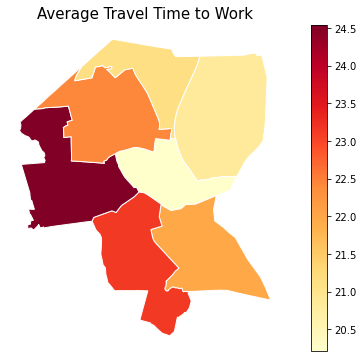

In [36]:

test1 = zipcodes.merge(data_2015, on="zip")
fig,ax = plt.subplots(1,figsize=(10,6))
test1.plot(column='avg_time_agg',legend=True, cmap='YlOrRd',edgecolor='white',ax=ax)
ax.axis('off')
ax.set_title('Average Travel Time to Work', fontdict={'fontsize': '15', 'fontweight' : '3'})

# test1['coords'] = test1['geometry'].apply(lambda x: x.representative_point().coords[:])
# test1['coords'] = [coords[0] for coords in test1['coords']]

# for idx, row in test1.iterrows():
#     plt.annotate(s=row['zip'], xy=row['coords'],horizontalalignment='center')

fig.savefig('average_time_to_work_2015.png',dpi=300)

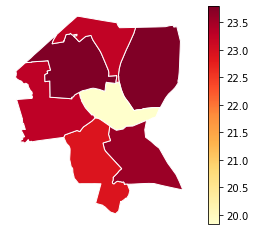

In [25]:
test = zipcodes.merge(data_2019, on="zip")
fig,ax = plt.subplots()
test.plot(column='avg_time_agg',legend=True, cmap='YlOrRd',edgecolor='white',ax=ax)
ax.axis('off')
fig.savefig('average_time_to_work.png',dpi=300)

<AxesSubplot:>

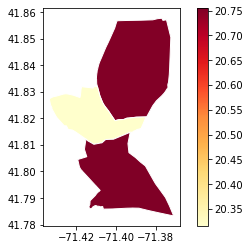

In [30]:
test1.plot(column='avg_travel_ctv',legend=True, cmap='YlOrRd',edgecolor='white') 
# car truck or van to work 

<AxesSubplot:>

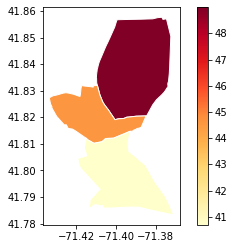

In [31]:
test1.plot(column='avg_travel_pt',legend=True, cmap='YlOrRd',edgecolor='white')